In [14]:
import os
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import networkx as nx
import nxutils as nxu
from dataclasses import asdict
from rich import print
from rich.tree import Tree
from rich.errors import NotRenderableError
from tbdoist import td_iter_to_graph, td_diGraph_to_richTree
import tbdoist as tbd
from modify import manage_supertask_link, manage_supertask_links


from todoist_api_python.api import TodoistAPI
from todoist_api_python.models import Section, Task, Project

In [2]:
tdapi = TodoistAPI(os.getenv("TODOIST_API_KEY"))

In [3]:
get_funcs = {"projects": tdapi.get_projects,
          "sections": tdapi.get_sections,
          "tasks": tdapi.get_tasks}
results = {}
for func in get_funcs:
    results[func] = get_funcs[func]()

In [4]:
tdg = nx.DiGraph(name="Todoist")
for kind in results:
    td_iter_to_graph(results[kind], g=tdg)
    #for obj in results[iter]:
    #    print(obj, type(obj))

In [5]:
tdg.graph

{'name': 'Todoist'}

In [6]:
sg = nx.subgraph_view(tdg, filter_edge=tbd.td_g_filter_factory(tdg))
t = td_diGraph_to_richTree(tdg)

In [7]:
traces = nxu.g_to_traces(sg, layout_func=nx.planar_layout)

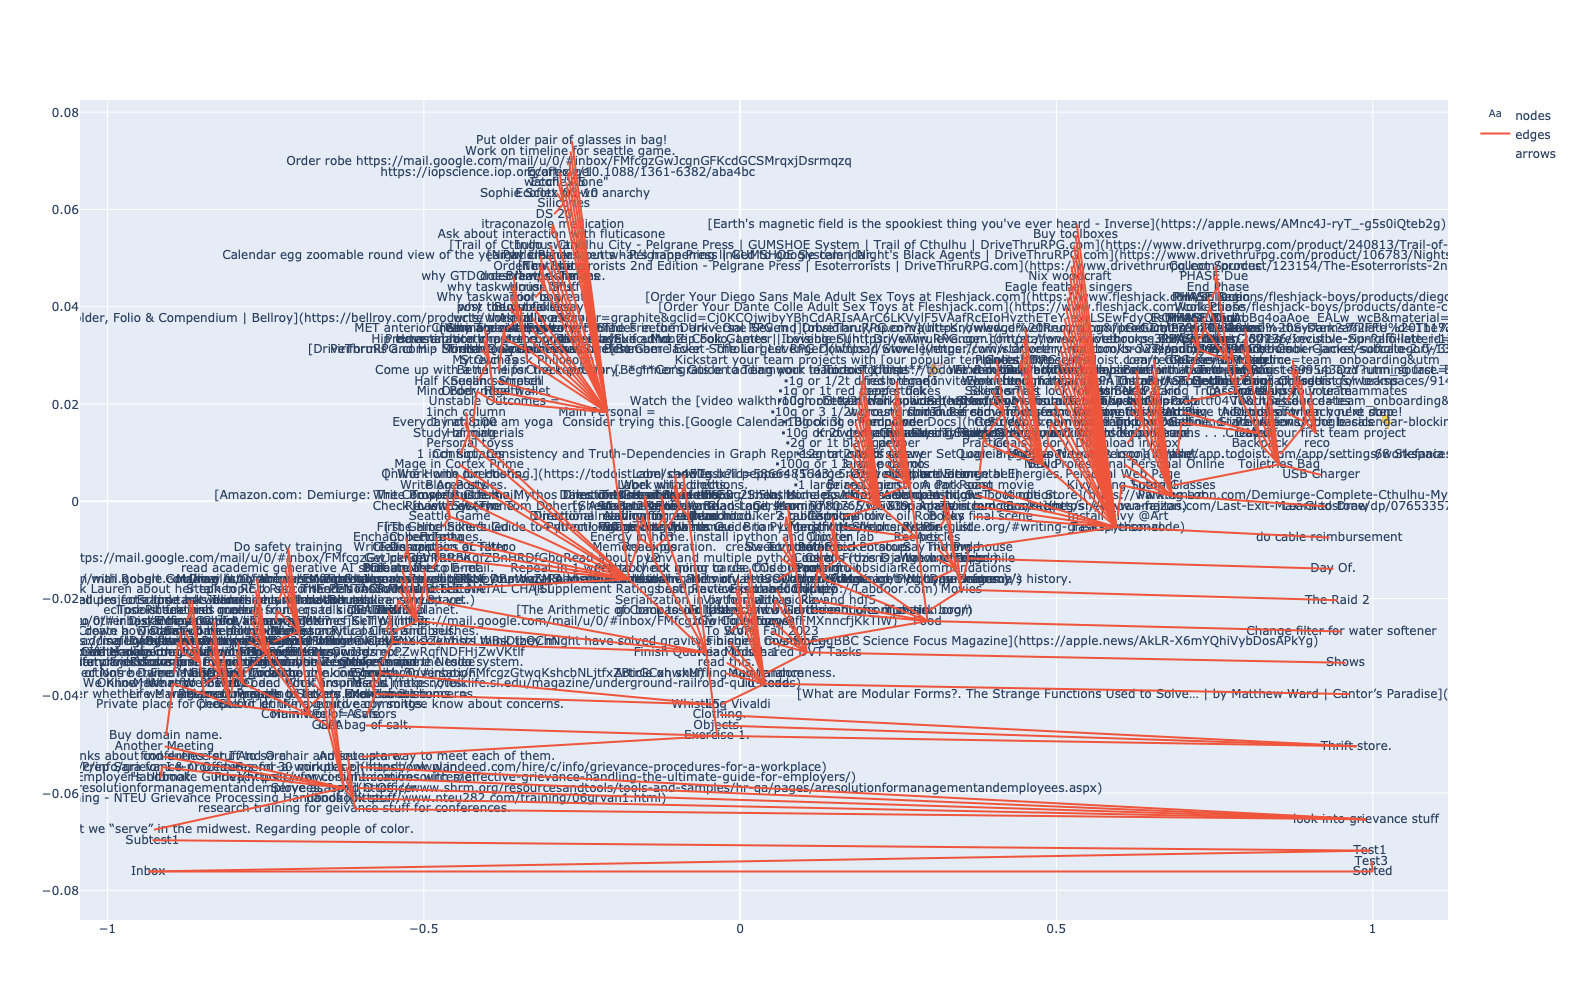

In [8]:
labels = []
for n in tdg.nodes:
    try:
        labels.append(tdg.nodes[n]["obj"].content)
    except AttributeError:
        labels.append(tdg.nodes[n]["obj"].name)

fig = go.Figure()
for name in traces:
    fig.add_trace(traces[name])
fig.update_traces(selector={"name": "nodes"}, mode="text", text=labels)
fig.update_layout(dict(height=1000))
#print(fig)

In [9]:
main_work_tasks = tdapi.get_tasks(filter="##Main Work =")

In [10]:
len(main_work_tasks)

73

In [11]:
results = manage_supertask_links(tdapi, tasks=main_work_tasks, update=False)

In [12]:
print(results)

[
    {
        <built-in function id>: '5730935043',
        'content': '[`Serve as I and O Officer`](https://todoist.com/showTask?id=7135173183) :: Committee of 
Asvisors'
    },
    {
        <built-in function id>: '5730935721',
        'content': '[`Serve as I and O Officer`](https://todoist.com/showTask?id=7135173183) :: Private place for 
people to let the executive committee know about concerns.'
    },
    {
        <built-in function id>: '5730937828',
        'content': '[`Serve as I and O Officer`](https://todoist.com/showTask?id=7135173183) :: Place for people to
let me know about concerns.'
    },
    {
        <built-in function id>: '5731139237',
        'content': '[`Serve as I and O Officer`](https://todoist.com/showTask?id=7135173183) :: handbook stuff.'
    },
    {
        <built-in function id>: '5774077354',
        'content': '[`Prep Sara for I & O Officer`](https://todoist.com/showTask?id=7431171431) :: Handbook'
    },
    {
        <built-in function id>: '6276203955',
        'content': '[`Serve as I and O Officer`](https://todoist.com/showTask?id=7135173183) :: Get data on the 
population that we “serve” in the midwest. Regarding people of color.'
    },
    {
        <built-in function id>: '6280017502',
        'content': '[`handbook stuff.`](https://todoist.com/showTask?id=5731139237) :: Privacy policy for 
communications with me.'
    },
    {
        <built-in function id>: '6296512378',
        'content': '[`handbook stuff.`](https://todoist.com/showTask?id=5731139237) :: Spend 30 minutes on handbook
plan'
    },
    {
        <built-in function id>: '6687814424',
        'content': '[`handbook stuff.`](https://todoist.com/showTask?id=5731139237) :: find duties for I And O 
chair and set up a way to meet each of them.'
    },
    {
        <built-in function id>: '6701121343',
        'content': '[`handbook stuff.`](https://todoist.com/showTask?id=5731139237) :: research training for 
geivance stuff for conferences.'
    },
    {
        <built-in function id>: '6701128094',
        'content': '[`research training for geivance stuff for 
conferences.`](https://todoist.com/showTask?id=6701121343) :: look into grievance stuff'
    },
    {
        <built-in function id>: '6701129274',
        'content': '[`look into grievance stuff`](https://todoist.com/showTask?id=6701128094) :: [Training - NTEU 
Grievance Processing Handbook](https://www.nteu282.com/training/06grvan1.html)'
    },
    {
        <built-in function id>: '6701129899',
        'content': '[`look into grievance stuff`](https://todoist.com/showTask?id=6701128094) :: 
[https://www.shrm.org/resourcesandtools/tools-and-samples/hr-qa/pages/aresolutionformanagementandemployees.aspx](ht
tps://www.shrm.org/resourcesandtools/tools-and-samples/hr-qa/pages/aresolutionformanagementandemployees.aspx)'
    },
    {
        <built-in function id>: '6701130313',
        'content': "[`look into grievance stuff`](https://todoist.com/showTask?id=6701128094) :: [Effective 
Grievance Handling: The Employer's Ultimate 
Guide](https://www.i-sight.com/resources/effective-grievance-handling-the-ultimate-guide-for-employers/)"
    },
    {
        <built-in function id>: '6701130679',
        'content': '[`look into grievance stuff`](https://todoist.com/showTask?id=6701128094) :: 
[https://www.indeed.com/hire/c/info/grievance-procedures-for-a-workplace](https://www.indeed.com/hire/c/info/grieva
nce-procedures-for-a-workplace)'
    },
    {
        <built-in function id>: '6988306986',
        'content': '[`Respond regarding Slavery and Planetariums. =`](https://todoist.com/showTask?id=7080597365) 
:: Check out drinking gourd early songs.'
    },
    {
        <built-in function id>: '6988341222',
        'content': '[`Respond regarding Slavery and Planetariums. =`](https://todoist.com/showTask?id=7080597365) 
:: [Underground Railroad Quilt Codes: What We Know, What We Believe, and What Inspires 
Us](https://folklife.si.edu/magazine/underground-railroad-qui

In [15]:
d = {Project: "Project"}